https://towardsdatascience.com/regression-with-pycaret-a-better-machine-learning-library-e02762a0615c

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(f'data\Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.drop(['No', 'X1 transaction date'], axis=1, inplace=True)
df.columns = ['Age', 'DistanceToMTR', 'NumStores', 'Latitude', 'Longitude', 'UnitPrice']
df.head()

,Age,DistanceToMTR,NumStores,Latitude,Longitude,UnitPrice
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
import matplotlib.pyplot as plt

(array([ 28.,  95., 111., 115.,  52.,   9.,   3.,   0.,   0.,   1.]),
 array([  7.6 ,  18.59,  29.58,  40.57,  51.56,  62.55,  73.54,  84.53,
         95.52, 106.51, 117.5 ]),
 <a list of 10 Patch objects>)

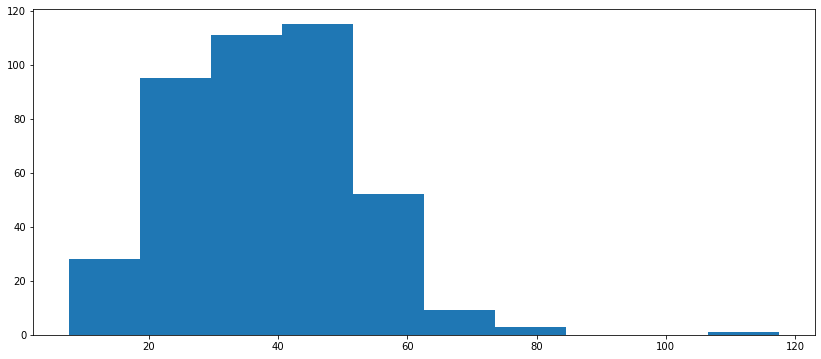

In [5]:
plt.figure(figsize=(14, 6))
plt.hist(df['UnitPrice'])

(array([12., 24., 55., 57., 61., 84., 55., 38., 19.,  3.]),
 array([ 7.6 , 13.81, 20.02, 26.23, 32.44, 38.65, 44.86, 51.07, 57.28,
        63.49, 69.7 ]),
 <a list of 10 Patch objects>)

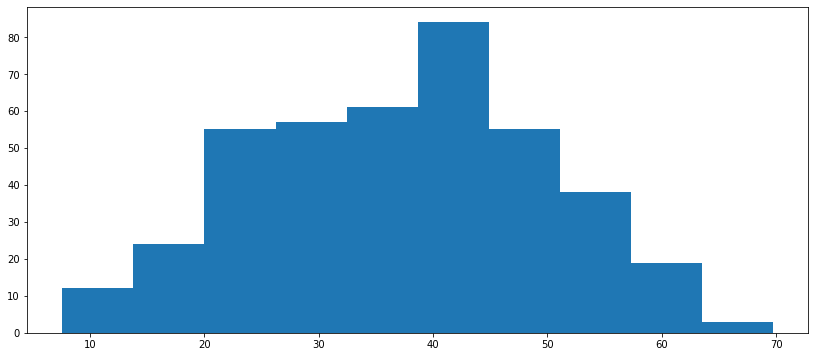

In [6]:
df = df[df['UnitPrice'] <= 70]
plt.figure(figsize=(14, 6))
plt.hist(df['UnitPrice'])

In [7]:
from pycaret.regression import *
exp_reg = setup(df, target='UnitPrice')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8985
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(408, 6)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,4.381700,35.197300,5.848400,0.758400,0.174300,0.140400
1,Extreme Gradient Boosting,4.479000,36.368900,5.939700,0.752100,0.175700,0.143600
2,Light Gradient Boosting Machine,4.526100,37.497400,6.029900,0.747700,0.178000,0.144300
3,Extra Trees Regressor,4.482900,37.041500,6.011000,0.747400,0.181300,0.145500
4,Random Forest,4.543200,37.529400,6.056800,0.745900,0.179600,0.146000
5,Gradient Boosting Regressor,4.656700,38.423400,6.120700,0.737800,0.181900,0.149700
6,AdaBoost Regressor,4.837600,40.467100,6.262200,0.732700,0.192600,0.163700
7,Linear Regression,5.278600,51.679300,7.049400,0.665900,0.218700,0.172500
8,Random Sample Consensus,5.380000,51.761800,7.062500,0.665700,0.219900,0.174400
9,K Neighbors Regressor,5.430200,52.633600,7.217500,0.639100,0.208500,0.169700


In [9]:
model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.6616,33.6130,5.7977,0.8486,0.1874,0.1655
1,4.5797,34.8119,5.9002,0.6797,0.1570,0.1207
2,4.0170,23.5895,4.8569,0.8372,0.1339,0.1145
3,3.9417,27.8874,5.2808,0.7915,0.1286,0.1086
4,4.7802,36.6863,6.0569,0.7025,0.1546,0.1257
5,4.4162,34.5738,5.8799,0.6840,0.1523,0.1229
6,4.1707,32.7097,5.7192,0.8377,0.1776,0.1425
7,5.1338,61.0695,7.8147,0.5920,0.3264,0.2692
8,5.3669,59.7507,7.7299,0.6891,0.2040,0.1510
9,4.3640,30.6020,5.5319,0.7969,0.1740,0.1391


In [10]:
tuned_model = tune_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.1303,40.7244,6.3816,0.8166,0.1900,0.1724
1,4.1768,29.7926,5.4583,0.7259,0.1453,0.1078
2,4.7381,35.5499,5.9624,0.7547,0.1609,0.1339
3,3.3963,19.6347,4.4311,0.8532,0.1153,0.0989
4,3.9687,27.9115,5.2831,0.7736,0.1259,0.1026
5,3.8106,23.6523,4.8634,0.7838,0.1339,0.1049
6,3.9337,31.7666,5.6362,0.8424,0.1767,0.1337
7,5.4456,59.9119,7.7403,0.5997,0.3247,0.2781
8,5.4024,61.3576,7.8331,0.6807,0.2148,0.1572
9,3.8899,27.6475,5.2581,0.8166,0.1585,0.1212


In [11]:
plot_model('tuned_model')

IntProgress(value=0, description='Processing: ', max=5)

YellowbrickTypeError: This estimator is not a regressor; try a classifier or clustering score visualizer instead!

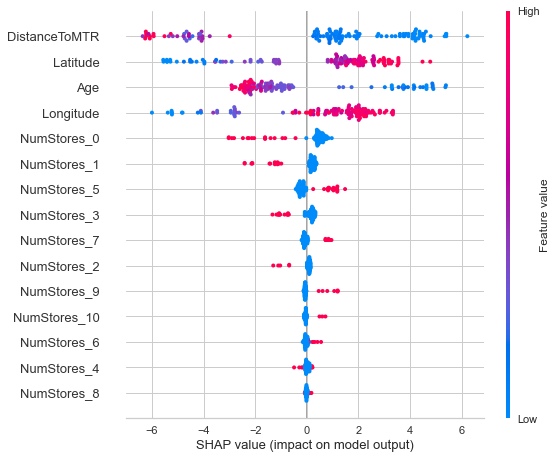

In [12]:
interpret_model(tuned_model)

In [13]:
predictions = predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,4.3474,39.2151,6.2622,0.7323,0.1577,0.1224


In [14]:
finalize_model(tuned_model)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=190, n_jobs=None, oob_score=False,
                      random_state=8985, verbose=0, warm_start=False)

In [15]:
save_model(tuned_model, 'realestate_rf')

Transformation Pipeline and Model Succesfully Saved
